In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [32]:
# Load the dataset
user_research = pd.read_csv('user-research.csv')

user_research.head()

,Q1_Email,Q2_Gender,Q3_Age,Q4_Income,Q5_Neighborhood,Q6_Taxis,Q7_Rideshare,Q8_Flying_Taxi,Q9_If_Yes,Q10_If_No
0,emailofnewyorker+369@gmail.com,M,65.0,"$80,000 - $120,000",Hudson Yards,N,Y,Y,22.0,NaN
1,emailofnewyorker+429@gmail.com,F,25.0,"$120,000 - $200,000",Fort George,Y,Y,N,NaN,I think it is more unsafe than taxis
2,emailofnewyorker+159@gmail.com,F,49.0,"$20,001 - $40,000",Theater District,N,Y,Y,6.0,NaN
3,emailofnewyorker+414@gmail.com,M,72.0,"> $200,000",Tribeca,Y,N,N,NaN,Wouldn't trust the person flying it
4,emailofnewyorker+375@gmail.com,F,42.0,"$80,000 - $120,000",Yorkville,N,N,Y,24.0,NaN


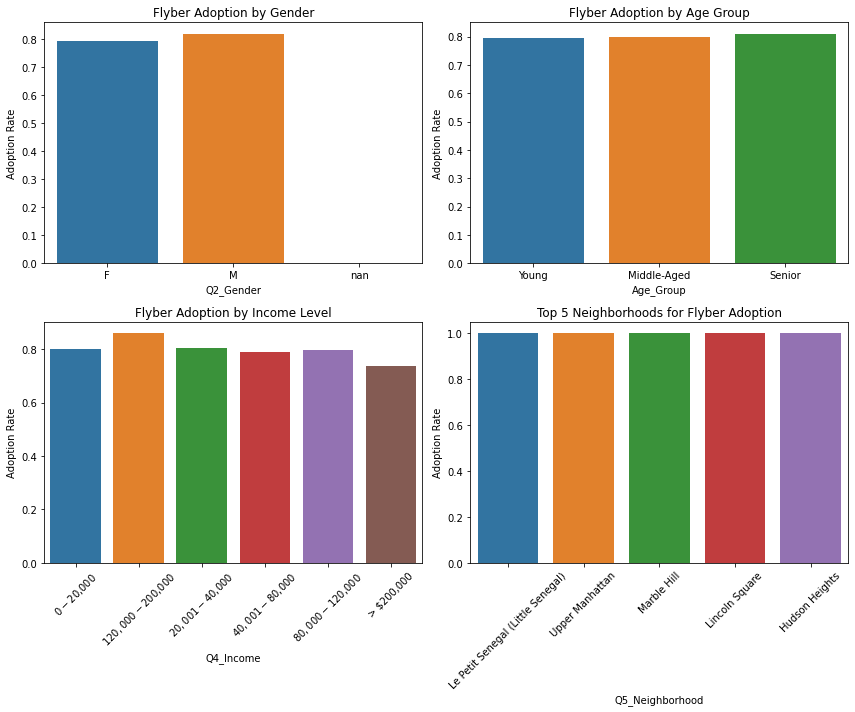

In [30]:

# Load the dataset
user_research = pd.read_csv('user-research.csv')

# Data conversion
user_research['Q2_Gender'] = user_research['Q2_Gender'].astype(str)
user_research['Q4_Income'] = user_research['Q4_Income'].astype('category')
user_research['Q5_Neighborhood'] = user_research['Q5_Neighborhood'].astype(str)
user_research['Q3_Age'] = pd.to_numeric(user_research['Q3_Age'], errors='coerce')
user_research['Q8_Flying_Taxi'] = user_research['Q8_Flying_Taxi'].map({'Y': 1, 'N': 0})

# Analysis
# Gender
gender_adoption = user_research.groupby('Q2_Gender')['Q8_Flying_Taxi'].mean()

# Age
age_bins = [0, 30, 60, 90]
age_labels = ['Young', 'Middle-Aged', 'Senior']
user_research['Age_Group'] = pd.cut(user_research['Q3_Age'], bins=age_bins, labels=age_labels)
age_adoption = user_research.groupby('Age_Group')['Q8_Flying_Taxi'].mean()

# Income
income_adoption = user_research.groupby('Q4_Income')['Q8_Flying_Taxi'].mean()

# Neighborhood - Selecting top 5
neighborhood_adoption = user_research.groupby('Q5_Neighborhood')['Q8_Flying_Taxi'].mean().sort_values(ascending=False).head(5)

# Visualization
plt.figure(figsize=(12, 10))

# Gender Graph
plt.subplot(2, 2, 1)
sns.barplot(x=gender_adoption.index, y=gender_adoption.values)
plt.title('Flyber Adoption by Gender')
plt.ylabel('Adoption Rate')

# Age Graph
plt.subplot(2, 2, 2)
sns.barplot(x=age_adoption.index, y=age_adoption.values)
plt.title('Flyber Adoption by Age Group')
plt.ylabel('Adoption Rate')

# Income Graph
plt.subplot(2, 2, 3)
sns.barplot(x=income_adoption.index, y=income_adoption.values)
plt.title('Flyber Adoption by Income Level')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=45)

# Neighborhood Graph
plt.subplot(2, 2, 4)
sns.barplot(x=neighborhood_adoption.index, y=neighborhood_adoption.values)
plt.title('Top 5 Neighborhoods for Flyber Adoption')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


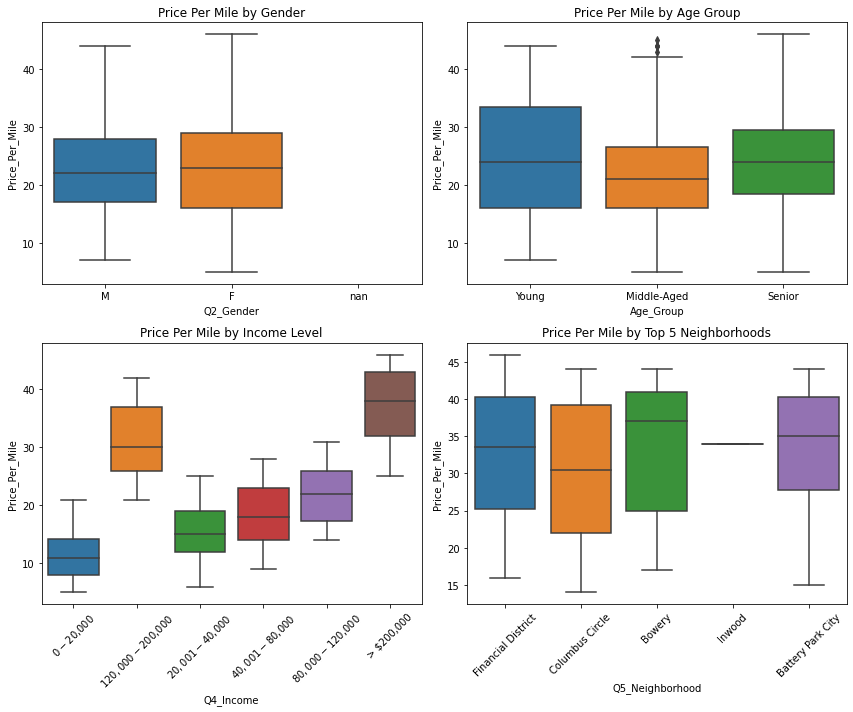

In [33]:
# Data conversion (assuming previous conversions are still applicable)
user_research['Q2_Gender'] = user_research['Q2_Gender'].astype(str)
user_research['Q4_Income'] = user_research['Q4_Income'].astype('category')
user_research['Q5_Neighborhood'] = user_research['Q5_Neighborhood'].astype(str)
user_research['Q3_Age'] = pd.to_numeric(user_research['Q3_Age'], errors='coerce')

# Convert 'Q9_If_Yes' to numeric and rename to 'Price_Per_Mile'
user_research['Price_Per_Mile'] = pd.to_numeric(user_research['Q9_If_Yes'], errors='coerce')

# Define age groups
age_bins = [0, 30, 60, 90]
age_labels = ['Young', 'Middle-Aged', 'Senior']
user_research['Age_Group'] = pd.cut(user_research['Q3_Age'], bins=age_bins, labels=age_labels)

# Visualization
plt.figure(figsize=(12, 10))

# Price Per Mile by Gender
plt.subplot(2, 2, 1)
sns.boxplot(x='Q2_Gender', y='Price_Per_Mile', data=user_research)
plt.title('Price Per Mile by Gender')

# Price Per Mile by Age Group
plt.subplot(2, 2, 2)
sns.boxplot(x='Age_Group', y='Price_Per_Mile', data=user_research)
plt.title('Price Per Mile by Age Group')

# Price Per Mile by Income Level
plt.subplot(2, 2, 3)
sns.boxplot(x='Q4_Income', y='Price_Per_Mile', data=user_research)
plt.title('Price Per Mile by Income Level')
plt.xticks(rotation=45)

# Price Per Mile by Neighborhood - Top 5 Neighborhoods
top_neighborhoods = user_research.groupby('Q5_Neighborhood')['Price_Per_Mile'].mean().sort_values(ascending=False).head(5).index
top_neighborhoods_data = user_research[user_research['Q5_Neighborhood'].isin(top_neighborhoods)]

plt.subplot(2, 2, 4)
sns.boxplot(x='Q5_Neighborhood', y='Price_Per_Mile', data=top_neighborhoods_data)
plt.title('Price Per Mile by Top 5 Neighborhoods')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Davi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Davi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


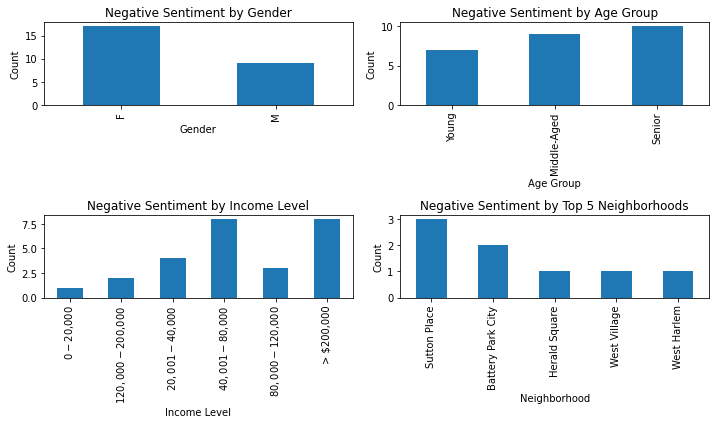

In [37]:
# Load the dataset
user_research = pd.read_csv('user-research.csv')

# Ensure that you have the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define the age groups before filtering for negative sentiments
age_bins = [0, 30, 60, 90]
age_labels = ['Young', 'Middle-Aged', 'Senior']
user_research['Age_Group'] = pd.cut(user_research['Q3_Age'], bins=age_bins, labels=age_labels)

# Function to clean and analyze sentiment
def analyze_sentiment(text):
    if pd.isna(text):
        return None  # Return None for missing values
    # Tokenize the text
    words = nltk.word_tokenize(text.lower())  # Lowercase and tokenize
    # Remove stopwords
    words = [word for word in words if word not in nltk.corpus.stopwords.words('english')]
    # Join the words back into a string
    text = ' '.join(words)
    # Analyze the sentiment
    return TextBlob(text).sentiment.polarity

# Apply the function to the 'Q10_If_No' column
user_research['Sentiment'] = user_research['Q10_If_No'].apply(analyze_sentiment)

# Filter out comments with negative sentiment
negative_sentiments = user_research[user_research['Sentiment'] < 0]

# Group by demographics to find segments with negative sentiment
negative_gender = negative_sentiments.groupby('Q2_Gender').size()
negative_age_group = negative_sentiments.groupby('Age_Group').size()
negative_income_level = negative_sentiments.groupby('Q4_Income').size()

# Group by neighborhood and get the top 5 with the most negative sentiments
negative_neighborhood = negative_sentiments.groupby('Q5_Neighborhood').size()
top_5_neighborhoods = negative_neighborhood.sort_values(ascending=False).head(5)

# Plotting the results
plt.figure(figsize=(10, 6))

# Negative Sentiment by Gender
plt.subplot(2, 2, 1)
negative_gender.plot(kind='bar')
plt.title('Negative Sentiment by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Negative Sentiment by Age Group
plt.subplot(2, 2, 2)
negative_age_group.plot(kind='bar')
plt.title('Negative Sentiment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Negative Sentiment by Income Level
plt.subplot(2, 2, 3)
negative_income_level.plot(kind='bar')
plt.title('Negative Sentiment by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')

# Negative Sentiment by Top 5 Neighborhoods
plt.subplot(2, 2, 4)
top_5_neighborhoods.plot(kind='bar')
plt.title('Negative Sentiment by Top 5 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Count')

plt.tight_layout()
plt.show()